In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

Table of contents:

[Part 0: Sanity checks](#part0)
- look at potential. does it LOOK like it should? one particle? two particles?
- periodic? non periodic?
- use DEBUG feature.

- should I show acceleration as well?

[Part 1: Single particle at rest](#part1)


### Part 0: Sanity Checks <a name="part0"></a>

#### Potential
The potential is defined to be everywhere negative, going towards zero at infinity. 
##### OR SHOULD I JUST LEAVE AS POSITIVE AND NOT BOTHER TAKING NEGATIVE GRAD OF FORCE.

The first sanity check we do is checking the potential for one and two particles, in both the periodic and non periodic boundary case, to make sure that we get the potential that we would intuitively expect.

The results shown below show exactly what we expect. The periodic boundary case has the potentials wrapping around. In the non-periodic boundary case, the green's potential, rather than being zero-padded to avoid wraparound in the convolution operation, is calculated out to 2\*gridlength - 1. This padding using the actual greens potential values provides an accurate non-periodic case. The full padded potential is shown where the wraparound can be seen; to get the desired potential it is clipped to the original grid size, removing the wraparound.

#### Two particle forces equal and opposite
The second sanity check we run through is that two particles feel equal and opposite force.
##### WORKS FOR EQUAL MASSES SANITY CHECK THAT IT WORKS FOR NOT EQUAL MASSES WHEN YOU IMPLEMENT MASSES


dr x = 0 is 
  [[0.         1.         2.         3.         4.         5.
  4.         3.         2.         1.        ]
 [1.         1.41421356 2.23606798 3.16227766 4.12310563 5.09901951
  4.12310563 3.16227766 2.23606798 1.41421356]
 [2.         2.23606798 2.82842712 3.60555128 4.47213595 5.38516481
  4.47213595 3.60555128 2.82842712 2.23606798]
 [3.         3.16227766 3.60555128 4.24264069 5.         5.83095189
  5.         4.24264069 3.60555128 3.16227766]
 [4.         4.12310563 4.47213595 5.         5.65685425 6.40312424
  5.65685425 5.         4.47213595 4.12310563]
 [5.         5.09901951 5.38516481 5.83095189 6.40312424 7.07106781
  6.40312424 5.83095189 5.38516481 5.09901951]
 [4.         4.12310563 4.47213595 5.         5.65685425 6.40312424
  5.65685425 5.         4.47213595 4.12310563]
 [3.         3.16227766 3.60555128 4.24264069 5.         5.83095189
  5.         4.24264069 3.60555128 3.16227766]
 [2.         2.23606798 2.82842712 3.60555128 4.47213595 5.38516481
  4.4

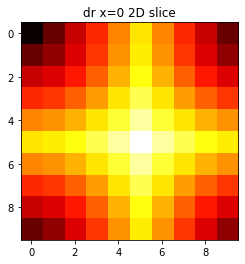

dr x = 0 is 
  [[3.         3.         3.         3.         4.         5.
  4.         3.         3.         3.        ]
 [3.         3.         3.         3.16227766 4.12310563 5.09901951
  4.12310563 3.16227766 3.         3.        ]
 [3.         3.         3.         3.60555128 4.47213595 5.38516481
  4.47213595 3.60555128 3.         3.        ]
 [3.         3.16227766 3.60555128 4.24264069 5.         5.83095189
  5.         4.24264069 3.60555128 3.16227766]
 [4.         4.12310563 4.47213595 5.         5.65685425 6.40312424
  5.65685425 5.         4.47213595 4.12310563]
 [5.         5.09901951 5.38516481 5.83095189 6.40312424 7.07106781
  6.40312424 5.83095189 5.38516481 5.09901951]
 [4.         4.12310563 4.47213595 5.         5.65685425 6.40312424
  5.65685425 5.         4.47213595 4.12310563]
 [3.         3.16227766 3.60555128 4.24264069 5.         5.83095189
  5.         4.24264069 3.60555128 3.16227766]
 [3.         3.         3.         3.60555128 4.47213595 5.38516481
  4.4

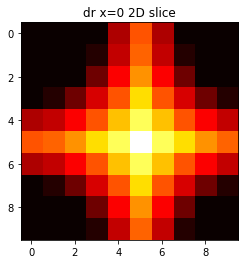

In [12]:
# #okaaaaaaayyyy buddy woah there. so you need to do more SOFTENING eh. plz.
# num_part = 1
# pos = 10*np.random.rand(3, num_part)
# print(pos)
# # v = np.random.rand(3, num_part)
# pos = np.array([[6], [0], [0]])
# v = np.array([[0], [0], [0]])
# nbody = NbodyClass(pos, v, sgrid=10, periodic=True)
# nbody.calculate_greens(DEBUG=True)
# # nbody.calculate_potential(DEBUG=True)

num_part = 1
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=True)
nbody.calculate_greens(DEBUG=True)


PERIODIC BOUNDARY CASE SINGLE PARTICLE


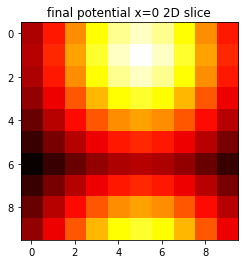

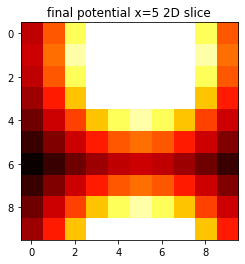

the particles are at  (array([6]), array([1]), array([5]))



 PERIODIC BOUNDARY CASE TWO PARTICLES


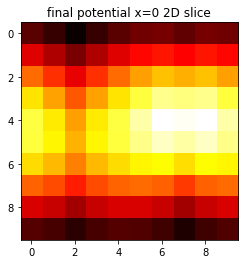

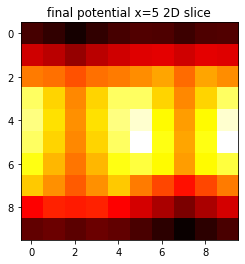

the particles are at  (array([3, 4]), array([4, 5]), array([7, 2]))



 NON-PERIODIC BOUNDARY CASE SINGLE PARTICLE


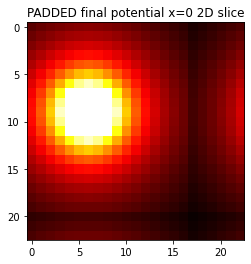

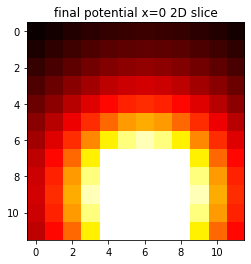

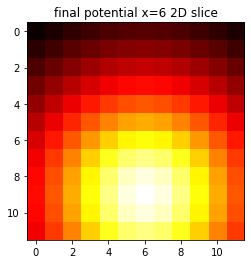

the particles are at  (array([1]), array([9]), array([6]))



 NON-PERIODIC BOUNDARY CASE TWO PARTICLES


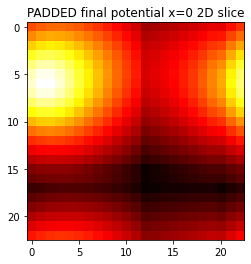

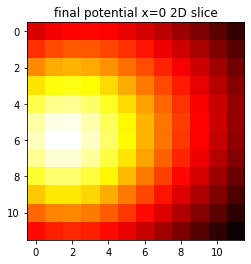

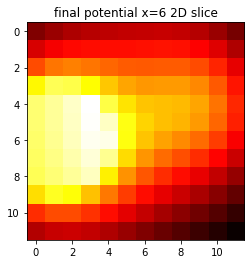

the particles are at  (array([ 5, 10]), array([6, 4]), array([1, 9]))


0

In [3]:
#SANITY CHECK FOR POTENTIALS.
print('PERIODIC BOUNDARY CASE SINGLE PARTICLE')
num_part = 1
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=True)
nbody.calculate_potential(DEBUG=True)

print('\n\n\n PERIODIC BOUNDARY CASE TWO PARTICLES')
num_part = 2
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=True)
nbody.calculate_potential(DEBUG=True)


print('\n\n\n NON-PERIODIC BOUNDARY CASE SINGLE PARTICLE')
num_part = 1
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=False)
nbody.calculate_potential(DEBUG=True)

print('\n\n\n NON-PERIODIC BOUNDARY CASE TWO PARTICLES')
num_part = 2
pos = 10*np.random.rand(3, num_part)
v = np.random.rand(3, num_part)
nbody = NbodyClass(pos, v, sgrid=10, periodic=False)
nbody.calculate_potential(DEBUG=True)

### Part 1: Single particle at rest <a name="part1"></a>
Here I demonstrate that a single particle at rest remains at rest, for a reasonable number of steps before machine precision begins to creep in.

When I ran it for 100,000 steps the particle had moved -3.5\*10^{-10} in the z direction, and still machine precision zero in the others.

In [4]:
# # Single particle at rest remains at rest. Both periodic and non periodic.
# num_part = 1
# steps = 10**2
# spread = 10

# pos = spread*np.random.rand(3, num_part)
# v = np.zeros( (3, num_part) )
# nbody_one = NbodyClass(pos, v, sgrid=spread, periodic=False)
# steps_done = nbody_one.take_n_steps(steps, plots=False)

# print('Steps taken: ', steps)
# print('Initial position: ', pos)
# print('Final position: ', nbody_one.get_x())
# print('Amount moved: ', pos-nbody_one.get_x())

0.08920620580763855
ii is  0
ii is  1000


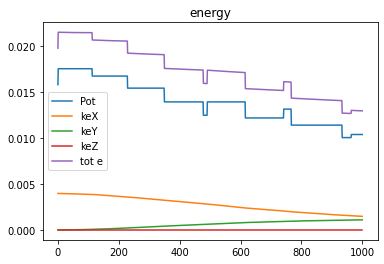

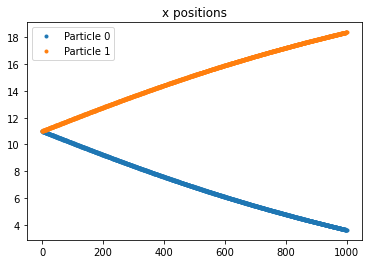

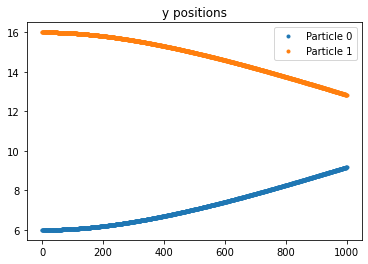

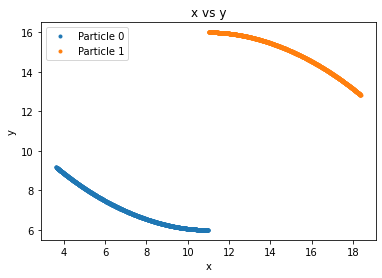

In [7]:
# #testing acceleration

# num_part = 2
# steps = 10**3 + 1
# # steps=100
# spread = 20
# pos = 10*np.random.rand(3, num_part)
# vel = np.random.rand(3, num_part)
# # pos = np.array([[10, 10],[8, 12], [10, 10]])
# # vel = np.array([[-0.25, 0.25], [0, 0], [0, 0]])
# print('particle positions are: ', pos)
# nbody2 = NbodyClass(pos, vel, dt=0.1, sgrid=spread, periodic=False)
# nbody2.calculate_potential(DEBUG=False)
# nbody2.calculate_acceleration(DEBUG=False)

Leapfrog: 
Velocity and position half a timestep out of sync. Velocity is therefore average btwn two positions, position is average position btwn two velocities. 2nd order with no extra work.
BUT can't change timestep. That's fine. Use fixed timestep.
LEAPFROGGING: only update v HALF of the way. pretend velocity is t + 1/2, position at time t.
Nov 2, 7 minutes.
Update forces based on x position HALFWAY through timestep. getting average basically.

Softening: particles fuzzy balls, bring them close and the force should drop, rather than explode as 1/r^2 with the force. Example:

$F ~ \frac{r}{(r^2 + eps^2)^{3/2}}$

Potential:
Global potential is the potential from a SINGLE PARTICLE, convolved with the density field.
Force is the GRADIENT of the potential.
FFT nlogn <<< n^2 for lots of particles.

Scheme:
- make a GRID to calculate the density
- SUM particles onto nearest grid cell
- convolve with desired potential
- have potential, for each particle, calculate GRADIENT of potential at its position


MY MAIN QUESTIONS:
Cells:
how big are CELLS supposed to be compared to movement?
can't have particles travelling further than one cell over, right? or simulation breaks down / timestep too large

Boundary conditions:
what was that thing about guard cells?

Scale:
does it make sense to use the atomic mass and radius? why multiply super tiny numbers if we don't have to though?

Self-energy:
Remove it. How to with potential? add in a single potential term?

Plotting:
plot every x steps? or plot after waiting a certain amount of time?

SANITY CHECKS:
single particle at rest stays at rest
two particles continue to orbit
    - can check forces equal and opposite
    - particles should not be able to move farther apart then they started
   
 
